## Nhập thư viện:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets as gds
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

c:\Users\ROCK\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


## Đọc dữ liệu:

In [2]:
df = pd.read_csv('../Datasets/data_cleaned.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually


## Phân tích nhân khẩu học:

### Lựa chọn thuộc tính:

- `Customer ID`: Xác định duy nhất mỗi khách hàng, giúp liên kết các thông tin khác với cá nhân cụ thể.
- `Age`: Tuổi của khách hàng là yếu tố cốt lõi trong việc phân khúc nhóm khách hàng theo các nhóm tuổi khác nhau.
- `Gender`: Giới tính giúp so sánh hành vi tiêu dùng giữa nam và nữ.
- `Location`: Thông tin về địa điểm cho phép phân tích theo vùng miền, thành phố hoặc khu vực, từ đó xác định các đặc điểm khu vực.
- `Subscription Status`: Mặc dù không phải trực tiếp là nhân khẩu học, nhưng trạng thái đăng ký có thể liên quan đến thói quen tiêu dùng và sự trung thành của khách hàng theo nhóm nhân khẩu học.

In [3]:
demographic_df = df[['Customer ID', 'Age', 'Gender', 'Location', 'Subscription Status']]
demographic_df.sample(5)

,Customer ID,Age,Gender,Location,Subscription Status
2996,2997,70,Female,Utah,No
1612,1613,18,Male,Wisconsin,No
988,989,50,Male,Ohio,Yes
2624,2625,19,Male,South Dakota,No
2321,2322,50,Male,Colorado,No


### Lựa chọn các biểu đồ:

#### Biểu đồ **tròn (pie chart)** để trực quan hóa tỷ lệ giữa khách hàng nam và khách hàng nữ:
- **Hiển thị tỷ lệ rõ ràng**: dễ dàng thấy được ngay tỷ lệ giữa 2 giới khách hàng.

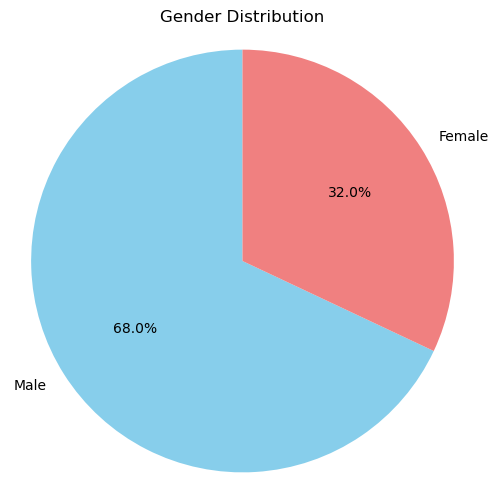

In [4]:
gender_counts = demographic_df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

##### Nhận xét từ biểu đồ tròn:
- Tỷ lệ khách hàng Nam và Nữ:
    - Nam (Male): Chiếm 68.0%.
    - Nữ (Female): Chiếm 32.0%.
    - Khách hàng nam chiếm tỷ lệ lớn hơn gấp đôi so với khách hàng nữ.
- Mất cân bằng giới tính:
    - Sự chênh lệch này cho thấy rằng doanh nghiệp đang tiếp cận được nhiều khách hàng nam hơn so với nữ.
- Khả năng nguyên nhân:
    - Sản phẩm/dịch vụ chủ yếu phục vụ nam giới.
    - Chiến dịch quảng cáo/Marketing không nhắm mục tiêu đủ đến khách hàng nữ.
    - Kênh bán hàng hoặc cách tiếp cận có thể phù hợp với nam hơn nữ.

##### Kết luận:
- Cần tìm hiểu thêm trong các phần tiếp theo để xem liệu rằng sản phẩm của doanh nghiệp dành cho nam nhiều hơn hay không, hay do chiến lược tiếp thị chưa thành công đối với tệp khách hàng nữ.
- Nếu sản phẩm được thiết kế chủ yếu cho nam, doanh nghiệp cần đánh giá lại chiến lược phát triển để không bỏ qua phân khúc khách hàng tiềm năng nữ.

#### Biểu đồ **Histogram** cho thuộc tính `Age`:
- **Trực quan phân bố độ tuổi**: Histogram cho phép nhìn thấy cách các độ tuổi được phân bố, xác định các nhóm tuổi phổ biến, khoảng cách, cũng như các điểm bất thường (outliers).
- **Đơn giản và hiệu quả**: Với biểu đồ này ta có thể dễ dàng trực quan hóa mật độ dữ liệu theo từng khoảng tuổi, từ đó hỗ trợ phân tích nhân khẩu học.

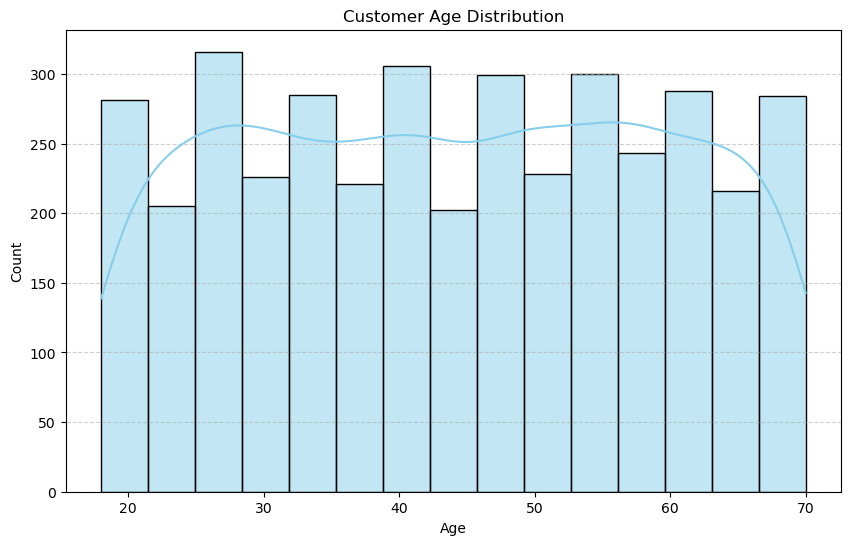

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(demographic_df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##### Nhận xét:
Dựa trên biểu đồ histogram và đường cong mật độ KDE cho thấy:

- Phân bố khá đồng đều:
    - Mức độ tập trung ở các nhóm tuổi không chênh lệch quá lớn, chứng tỏ khách hàng trải dài trên nhiều độ tuổi.
    - Một số khoảng tuổi có số lượng nhỉnh hơn (có thể quan sát khoảng 30-40), tuy nhiên sự chênh lệch không quá rõ rệt.

- Không có cực trị (outlier) quá rõ:
    - Biểu đồ không xuất hiện những cột cực kỳ thấp hoặc cực kỳ cao, cho thấy phân bố khách hàng về tuổi khá “tròn trịa” và ổn định.

- Đường cong mật độ (KDE) “gợn sóng” nhẹ:
    - Dễ thấy rằng đường cong có dao động, nhưng nhìn chung không có đỉnh hay đáy đột biến, củng cố quan sát rằng dữ liệu về tuổi không tập trung quá nhiều vào một nhóm duy nhất.

- Hàm ý cho việc phân khúc thị trường:
    - Do không có nhóm tuổi vượt trội, chiến lược marketing hoặc xây dựng gói dịch vụ cần xem xét đến đa dạng độ tuổi.
    - Có thể cần kết hợp thêm các thuộc tính khác (giới tính, vị trí địa lý, sở thích) để phân khúc chính xác hơn.

##### Mở rộng: Tìm hiểu từng độ tuổi phân bố như thế nào ở từng giới tính.

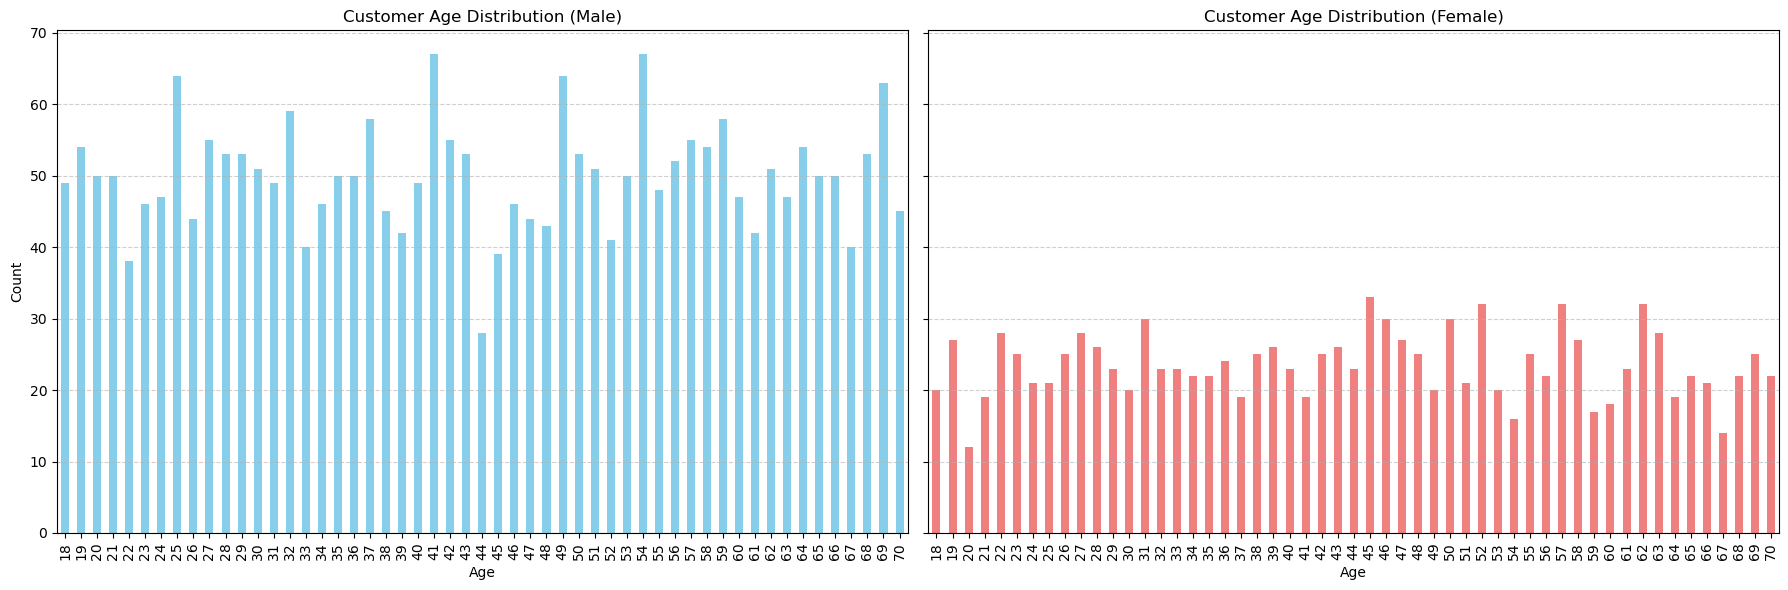

In [6]:
# Đếm số lượng khách hàng ở từng độ tuổi của nam
male_age_counts = demographic_df[demographic_df['Gender'] == 'Male']['Age'].value_counts().sort_index()

# Đếm số lượng khách hàng ở từng độ tuổi của nữ
female_age_counts = demographic_df[demographic_df['Gender'] == 'Female']['Age'].value_counts().sort_index()

# Tạo figure và các axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Biểu đồ cột cho khách hàng nam
male_age_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Customer Age Distribution (Male)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

# Biểu đồ cột cho khách hàng nữ
female_age_counts.plot(kind='bar', color='lightcoral', ax=axes[1])
axes[1].set_title('Customer Age Distribution (Female)')
axes[1].set_xlabel('Age')
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

##### Nhận xét:
- Số lượng khách hàng ở từng độ tuổi ở mỗi giới tính khá ngang nhau, chỉ chênh lệch một lượng nhỏ giữa các độ tuổi với nhau.
- Khách hàng nam:
    - Số lượng khách hàng 41 và 54 tuổi là cao nhất, ngoài ra khách hàng tuổi 25, 49 và 69 cũng chiếm số lượng nổi trội.
    - Có chưa tới 30 khách hàng tuổi 44, bên cạnh đó độ tuổi 22 và 45 đều chưa đạt 40 khách hàng.
- Khách hàng nữ:
    - Trong khi số lượng khách hàng nam ở tuổi 45 ít hơn so với đa số thì ở tệp khách hàng nữ chứng kiến sự ngược lại, đây là độ tuổi của nhiều khách hàng nữ nhất.
    - Có chưa tới 15 khách hàng nữ ở độ tuổi 20 và 67.

##### Kết luận: 
- Dữ liệu tuổi khách hàng khá cân bằng trên nhiều độ tuổi, không tập trung hẳn vào một nhóm cụ thể. Điều này gợi ý rằng doanh nghiệp có tệp khách hàng rộng về độ tuổi, cần phân tích kết hợp các yếu tố khác để phân nhóm, điều chỉnh sản phẩm và chiến lược tiếp thị phù hợp.

#### Biểu đồ **cột (bar chart)** theo nhóm để phân tích mối quan hệ giữa hai thuộc tính `Gender` và `Subscription Status`:
- **Dễ so sánh**: Biểu đồ cột giúp so sánh số lượng khách hàng nam/nữ có trạng thái đăng ký khác nhau (đã đăng ký, chưa đăng ký).
- **Phân nhóm trực quan**: Nhờ vào cách biểu diễn theo nhóm (hue), có thể quan sát ngay được xu hướng đăng ký ở từng nhóm giới tính.
- **Đơn giản, trực quan**: Rất phù hợp để hiển thị dữ liệu phân loại (categorical data) và so sánh tần suất.

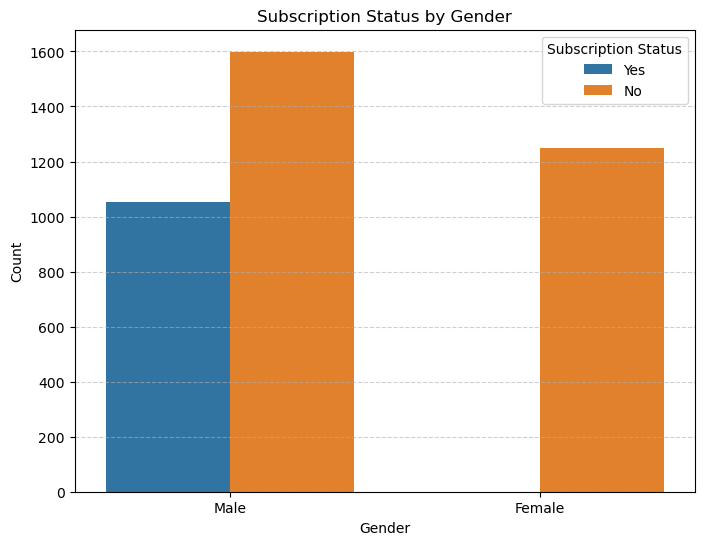

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=demographic_df, x='Gender', hue='Subscription Status')

plt.title('Subscription Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Subscription Status')
plt.show()

##### Nhận xét:
- Số lượng khách hàng Nam nhiều hơn Nữ.
- Khách hàng Nam tồn tại cả 2 trạng thái Đăng ký & Không đăng ký, trong khi đó tất cả khách hàng Nữ đều không đăng ký.
- Đối với khách hàng Nam, số lượng người không đăng ký vượt trội hơn số người đăng ký.

##### Kết luận:
- Ngoài việc số lượng người không đăng ký cao hơn rõ rệt thì việc không có khách hàng nữ nào đăng ký cũng là một điểm đáng chú ý. Điều này cho thấy chiến lược thất bại của doanh nghiệp trong việc thu hút khách hàng (đặc biệt là nữ).
- Để đưa ra các chiến lược trong tương lai, cần xác thực lại dữ liệu và điều chỉnh, cải tiến để thu hút, thúc đẩy đăng ký từ khách hàng.

#### Biểu đồ nhiệt (heatmap) để trực quan dữ liệu mua hàng ở từng bang và khu vực:
- **Sinh động**: Với thang đo số lượng bằng màu sắc và dữ liệu mua hàng được trực quan bằng bản đồ giúp cho việc quan sát và nhận xét rất dễ dàng.
- **Khả năng khoanh vùng**: Các vùng có màu tương tự nhau có thể được nhóm lại, từ đó đưa ra các chiến lược phù hợp.

In [8]:
# Đếm số lượng mua hàng ở từng bang
location_counts = df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']
location_counts.sample(5)

,Location,Count
36,Michigan,73
27,Texas,77
10,Delaware,86
42,South Dakota,70
49,Rhode Island,63


In [9]:
# Tải bản đồ nước Mỹ
usa = gpd.read_file('../Datasets/110m_cultural/ne_110m_admin_0_countries.shp')
usa = usa[usa['ADMIN'] == 'United States of America']

In [10]:
# Tạo GeoDataFrame từ dữ liệu mua hàng
states = gpd.read_file('../Datasets/110m_cultural/ne_110m_admin_1_states_provinces.shp')
states = states[states['admin'] == 'United States of America']

In [11]:
# Merge dữ liệu mua hàng với bản đồ các bang
merged = states.set_index('name').join(location_counts.set_index('Location'))
merged.sample(3)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name_alt,name_local,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,Count
name,,,,,,,,,,,,,,,,,,,,,
Montana,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,MT|Mont.,None,...,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00...",96.0
California,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,CA|Calif.,None,...,None,None,None,None,None,None,None,None,"POLYGON ((-114.64222 35.05311, -114.62212 34.9...",95.0
Nebraska,Admin-1 scale rank,2,USA-3532,3532,US-NE,http://en.wikipedia.org/wiki/Nebraska,US,1,NE|Nebr.,None,...,None,None,None,None,None,None,None,None,"POLYGON ((-102.05017 40.00081, -102.05017 40.0...",87.0


In [12]:
# Reset index để chuyển cột 'name' từ index sang cột thông thường
merged = merged.reset_index()

# Thêm cột 'id' để dùng làm chỉ số cho việc map với GeoJSON
merged['id'] = merged.index

# Chuyển GeoDataFrame sang GeoJSON thông qua thuộc tính __geo_interface__
geojson = merged.__geo_interface__

# Tạo bản đồ tương tác bằng Plotly Express
fig = px.choropleth(
    merged,
    geojson=geojson,
    locations='id',                 # Dùng cột 'id' làm chỉ số định danh
    color='Count',                  # Cột số lượt mua hàng
    hover_name='name',              # Khi di chuột, hiển thị tên bang
    hover_data={'Count': True},     # Hiển thị số lượt mua
    scope='usa',                    # Giới hạn bản đồ chỉ vùng Mỹ
    color_continuous_scale='YlGn',
    labels={'Count': 'Number of purchases'}
)

# Cập nhật các thuộc tính bản đồ
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title_text='Number of Purchases by State',
    margin={"r":0, "t":50, "l":0, "b":0}
)

fig.show()

##### Nhận xét:
- Số lượt mua ở từng có sự khác biệt tương đối rõ giữa các bang ở Hoa Kỳ.
- Các bang phía Đông phần lớn dao động trong khoảng 60-80 lượt mua, cho thấy doanh nghiệp đang tiếp cận với chiến lược rộng rãi và phù hợp với khu vực này.
- Nửa còn lại có sự phân hóa cao hơn, **Kansas** là bang có ít đơn hàng nhất với 63 lượt mua, đối nghịch với đó là bang **Montana**, **Idaho** & **California** đều có trên 90 lượt mua.
- Còn lại là các bang với số lượt mua hàng tầm trung bình.

##### Kết luận:
- Doanh nghiệp đang triển khai kế hoạch khá ổn với thị trường Hoa Kỳ, số đơn hàng không chênh lệch nhiều ở các bang.
- Tiếp tục khai thác thị trường hàng đầu như **Montana**, **California**, **Idaho**, **Illinois**. Bên cạnh đó cần điều chỉnh, cải thiện kế hoạch tiếp cận mạnh hơn ở các bang chưa nổi bật như **Kansas**, **Arizona**, **Florida**,...

## Phân tích tương quan các thuộc tính:

### Lựa chọn thuộc tính:

- Mục đích của phần này là khám phá mối quan hệ giữa các thuộc tính của bộ dữ liệu, do đó tất cả thuộc tính đều được chọn.

### Lựa chọn biểu đồ:

#### Biểu đồ **ma trận tương quan (Correlation Heatmap)** để trực quan mức độ tương quan giữa các biến số định lượng:
- Giúp nhận diện các cặp biến có mối liên hệ chặt chẽ và những biến có mối liên hệ yếu hoặc không liên quan.

In [13]:
# Chọn các thuộc tính định lượng
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df = numerical_df.drop('Customer ID', axis=1)
numerical_df.sample(3)

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
1667,51,40,3.4,24
1347,44,95,3.9,47
753,47,54,3.4,27


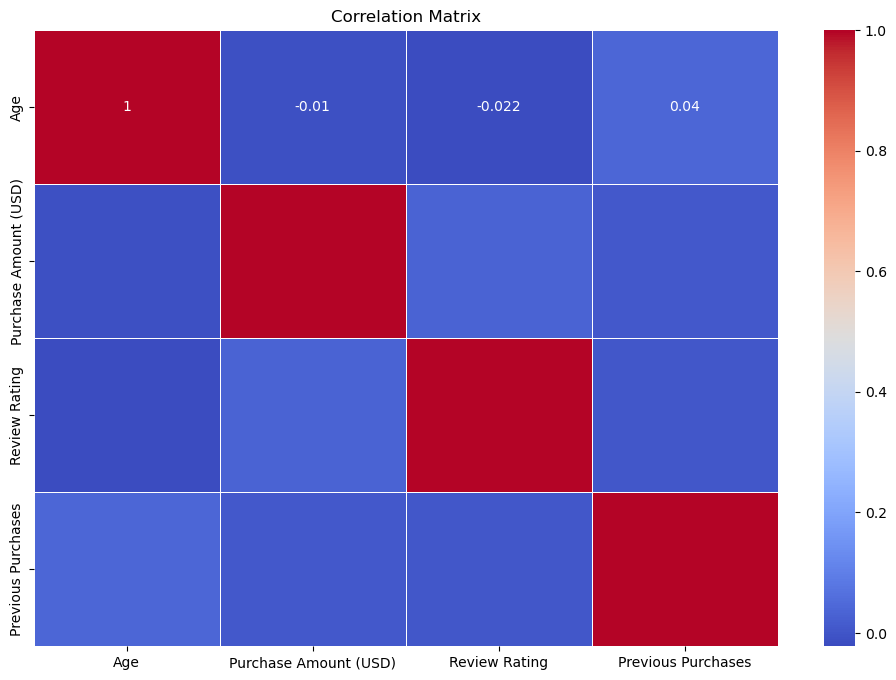

In [14]:
# Tính ma trận tương quan
correlation_matrix = numerical_df.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##### Nhận xét:
- Tất cả các hệ số tương quan chéo đều rất nhỏ (gần 0).
- Cả `Age` với `Purchase Amount (USD)`, `Review Rating` và `Previous Purchases` gần như không có mối quan hệ tuyến tính.

##### Kết luận:
- Các yếu tố như tuổi, số lần mua trước, đánh giá sản phẩm hay giá trị đơn hàng không tác động mạnh mẽ lẫn nhau, ít nhất là dưới góc độ tương quan tuyến tính.

#### Biểu đồ **Pairplot** để xem phân phối của từng biến định lượng và phát hiện mối quan hệ (như phi tuyến, cụm, outliers) giữa chúng:

- **Nhận biết nhanh các đặc điểm về phân phối**: trung bình, độ lệch, độ lệch chuẩn, outliers,…
- **Quan sát mối quan hệ giữa từng cặp biến**: Mỗi ô trong ma trận (trừ đường chéo) là một biểu đồ phân tán (scatter plot) giữa hai biến.

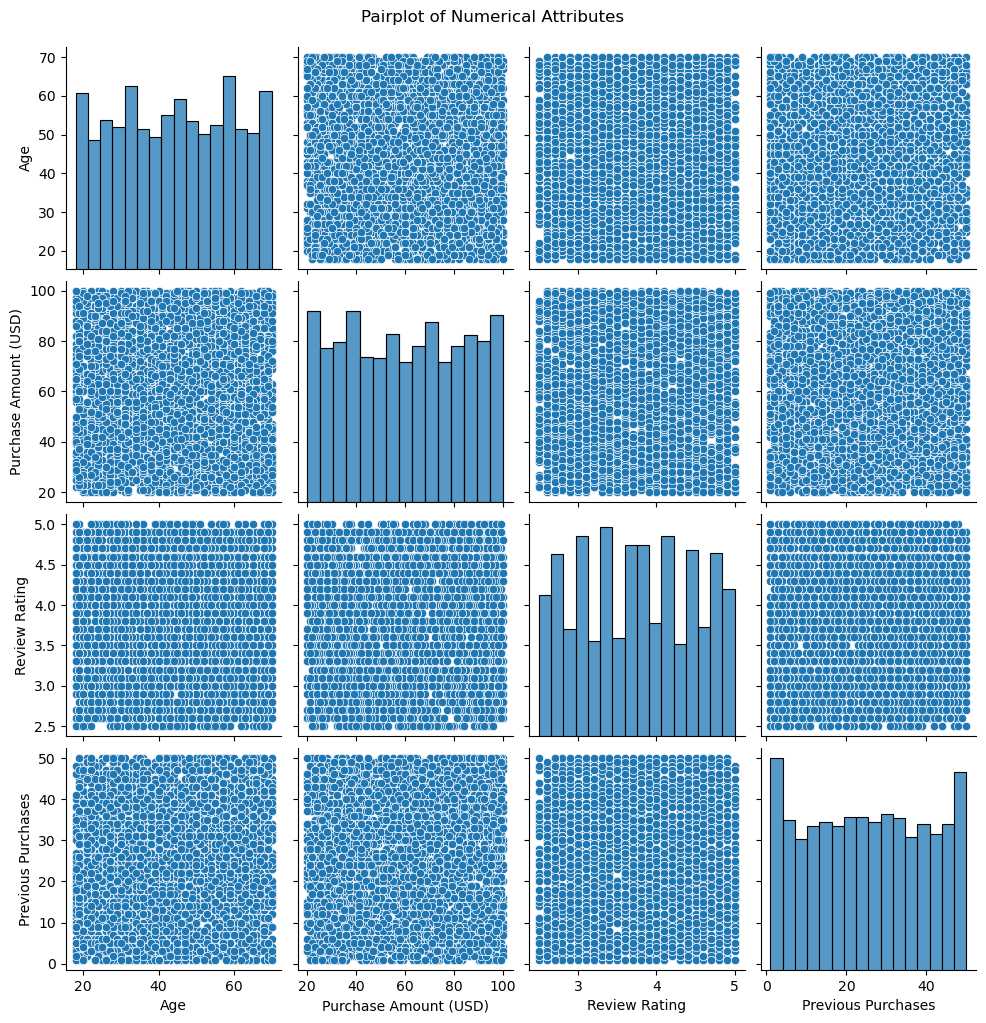

In [15]:
sns.pairplot(numerical_df)
plt.suptitle('Pairplot of Numerical Attributes', y=1.02)
plt.show()

##### Nhận xét:
- Phân phối của từng biến (trên đường chéo chính):
    - `Age`: dựa vào histogram, dữ liệu tuổi trải đều từ khoảng 10 đến 70, không có đỉnh nổi trội.
    - `Purchase Amount (USD)`: phân phối khá “phẳng” (trải rộng) trong khoảng 20–100 USD, không thấy dấu hiệu tập trung rõ ở một khoảng giá.
    - `Review Rating`: các đánh giá dao động từ 1 đến 5, phân bố có thể nghiêng nhẹ nhưng không quá rõ rệt.
    - `Previous Purchases`: Dữ liệu tập trung nhiều ở 2 đầu, nhưng vẫn rải đều ở các mức cao (20–40), cho thấy có một số khách hàng mua khá nhiều lần trước đó.
- Quan hệ giữa các cặp biến (các ô không thuộc đường chéo):
    - Các điểm dữ liệu rải ngẫu nhiên, không thành cụm, không theo đường thẳng hay cong.
    - Không quan sát thấy xu hướng tăng/giảm rõ rệt khi so sánh bất kỳ cặp biến nào.
    - Điều này phù hợp với việc ma trận tương quan gần như  bằng 0 (không có tương quan tuyến tính mạnh).
- Outliers và phân cụm:
    - Không nhận thấy cụm (cluster) rõ ràng, dữ liệu có vẻ phân tán rất đồng đều, không có nhóm tách biệt.
    - Không có dấu hiệu của outliers đặc biệt từ góc nhìn biểu đồ.

#### Biểu đồ **Boxplot** để so sánh phân phối của các biến định lượng theo các nhóm của biến phân loại:

- Hiển thị các số liệu thống kê như trung vị, khoảng tứ phân vị và các điểm ngoại lệ của mỗi nhóm.

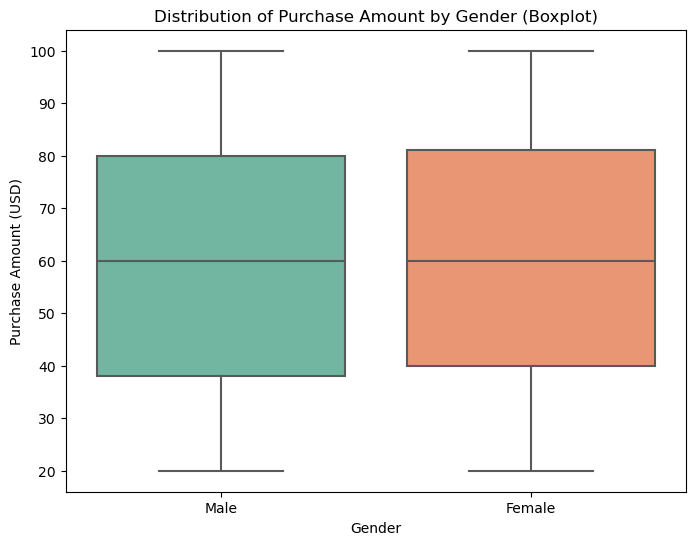

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)', palette='Set2')
plt.title('Distribution of Purchase Amount by Gender (Boxplot)')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

##### Nhận xét:
- Phân phối về giá trị đơn hàng được chi trả của khách hàng nam và nữ khá đồng đều nhau. Đa số đơn hàng tập trung từ 40 USD đến 80 USD, giá trị trung bình của các đơn hàng là 60 USD.

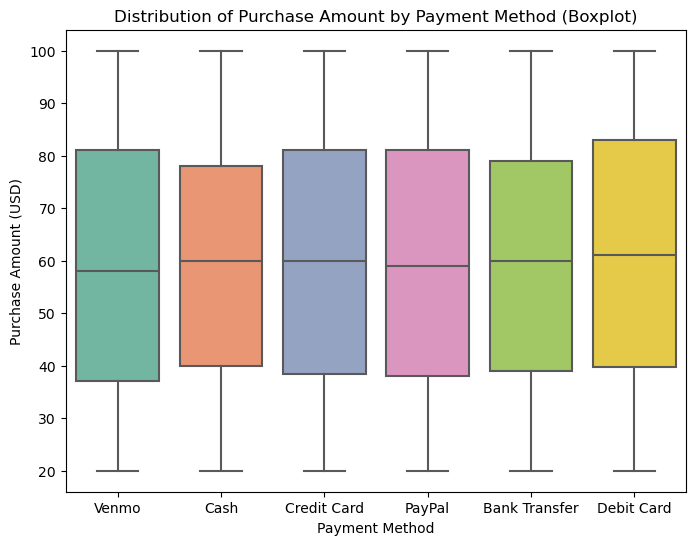

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Payment Method', y='Purchase Amount (USD)', palette='Set2')
plt.title('Distribution of Purchase Amount by Payment Method (Boxplot)')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount (USD)')
plt.show()

##### Nhận xét:
- Phân phối về giá trị đơn hàng của các phương thức thanh toán cũng khá tương đồng.

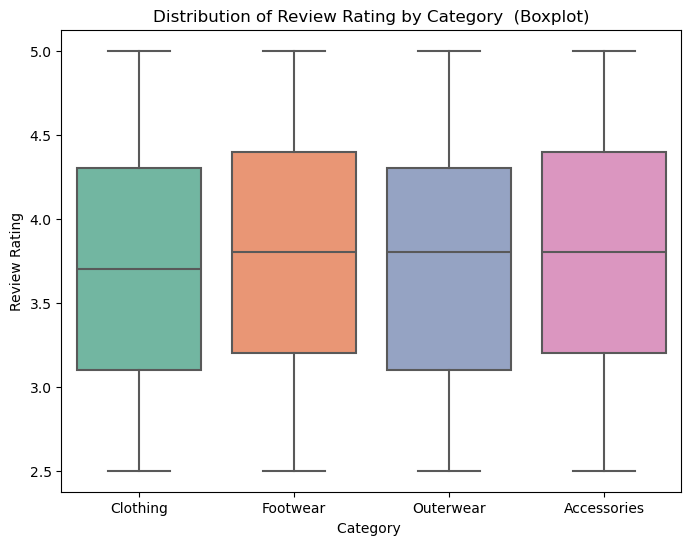

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Category', y='Review Rating', palette='Set2')
plt.title('Distribution of Review Rating by Category  (Boxplot)')
plt.xlabel('Category ')
plt.ylabel('Review Rating')
plt.show()

#### Nhận xét:
- Phân phối về đánh giá của từng loại sản phẩm không quá chênh lệch. Tất cả các loại sản phẩm phần lớn có được đánh giá ở mức trung bình (từ khoảng 3.1 đến 4.4).